In [100]:
%matplotlib inline

import networkx as nx
from  pprint import pprint
import matplotlib.pyplot as plt

SC version see index

Load food and nutrients

In [101]:
graph = nx.Graph()
file = open("../LocalData/nutrients_and_food.csv",'r')
for line in file:
    processed_line = line.strip('\n')
    data = processed_line.split(',')
    graph.add_node(data[0])
    graph.add_node(data[1])
    graph.add_edge(data[0],data[1])

In [102]:
pprint(graph.nodes())

NodeView(('A', 'carrots', 'eggs', '"fatty fish"', '"green leafy vegs"', 'liver', 'milk', 'tomatoes', 'B12', 'B6', 'asparagus', 'beans', 'kidneys', 'potatoes', 'C', 'pumpkins', 'Ca', 'broccoli', 'cheese', 'Cu', 'nuts', '"whole grains"', 'D', 'mushrooms', 'E', 'seeds', 'Mn', 'legumes', 'wheat', 'Se', 'Zn', 'beef', 'riboflavin', 'niacin', 'folates', 'spinach', 'poultry', 'shellfish', 'thiamin', '"veg oils"', 'yogurt'))


In [103]:
pprint(graph.edges())

EdgeView([('A', 'carrots'), ('A', 'eggs'), ('A', '"fatty fish"'), ('A', '"green leafy vegs"'), ('A', 'liver'), ('A', 'milk'), ('A', 'tomatoes'), ('carrots', 'C'), ('eggs', 'B12'), ('eggs', 'riboflavin'), ('"fatty fish"', 'B6'), ('"fatty fish"', 'D'), ('"fatty fish"', 'B12'), ('"fatty fish"', 'niacin'), ('"green leafy vegs"', 'Mn'), ('"green leafy vegs"', 'C'), ('"green leafy vegs"', 'Ca'), ('"green leafy vegs"', 'E'), ('"green leafy vegs"', 'riboflavin'), ('liver', 'B6'), ('liver', 'Cu'), ('liver', 'folates'), ('liver', 'Se'), ('liver', 'Zn'), ('milk', 'B12'), ('milk', 'D'), ('milk', 'Ca'), ('milk', 'riboflavin'), ('tomatoes', 'C'), ('tomatoes', 'tomatoes'), ('B12', 'beef'), ('B12', 'poultry'), ('B6', 'asparagus'), ('B6', 'beans'), ('B6', 'kidneys'), ('B6', 'potatoes'), ('B6', 'beef'), ('B6', 'poultry'), ('asparagus', 'folates'), ('beans', 'Zn'), ('beans', 'Cu'), ('kidneys', 'Se'), ('kidneys', 'Zn'), ('kidneys', 'Cu'), ('potatoes', 'Zn'), ('potatoes', 'Cu'), ('C', 'pumpkins'), ('C', 'b

Show data

In [104]:
print(graph.nodes())

['A', 'carrots', 'eggs', '"fatty fish"', '"green leafy vegs"', 'liver', 'milk', 'tomatoes', 'B12', 'B6', 'asparagus', 'beans', 'kidneys', 'potatoes', 'C', 'pumpkins', 'Ca', 'broccoli', 'cheese', 'Cu', 'nuts', '"whole grains"', 'D', 'mushrooms', 'E', 'seeds', 'Mn', 'legumes', 'wheat', 'Se', 'Zn', 'beef', 'riboflavin', 'niacin', 'folates', 'spinach', 'poultry', 'shellfish', 'thiamin', '"veg oils"', 'yogurt']


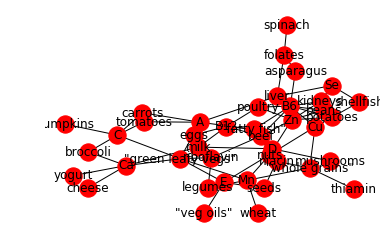

In [105]:
plt.axis('off')
nx.draw_networkx(graph,nx.spring_layout(graph))
#,pos,with_lables=False)

## Version 2

This shows how to add atributes to the nodes

Load list of nutrients

In [115]:
nutrients = []
file = open('../LocalData/nutrients.csv')
for line in file:
    processed_line = line.strip('\n')
    data = processed_line.split(',')
    nutrients.append(data[0])

list nutrients

In [116]:
pprint(nutrients)

['Cu',
 'thiamin',
 'D',
 'Mn',
 'riboflavin',
 'folates',
 'B12',
 'Ca',
 'C',
 'niacin',
 'Se',
 'B6',
 'Zn',
 'E',
 'A']


Add data to each node. 
If the item from the file nutients_and_food is a nutrient the set as true else false 

In [117]:
graph_n = nx.Graph()
file = open("../LocalData/nutrients_and_food.csv",'r')
for line in file:
    processed_line = line.strip('\n')
    data = processed_line.split(',')
    graph_n.add_nodes_from([(data[0],{"nutrients": data[0] in nutrients})])
    graph_n.add_nodes_from([(data[1],{"nutrients": data[1] in nutrients})])
    graph_n.add_edge(data[0],data[1])

Networkx stores nod and data as a tuple

In [118]:
for n in graph_n.nodes(data=True):
    print(type(n),n)


<class 'tuple'> ('A', {'nutrients': True})
<class 'tuple'> ('carrots', {'nutrients': False})
<class 'tuple'> ('eggs', {'nutrients': False})
<class 'tuple'> ('"fatty fish"', {'nutrients': False})
<class 'tuple'> ('"green leafy vegs"', {'nutrients': False})
<class 'tuple'> ('liver', {'nutrients': False})
<class 'tuple'> ('milk', {'nutrients': False})
<class 'tuple'> ('tomatoes', {'nutrients': False})
<class 'tuple'> ('B12', {'nutrients': True})
<class 'tuple'> ('B6', {'nutrients': True})
<class 'tuple'> ('asparagus', {'nutrients': False})
<class 'tuple'> ('beans', {'nutrients': False})
<class 'tuple'> ('kidneys', {'nutrients': False})
<class 'tuple'> ('potatoes', {'nutrients': False})
<class 'tuple'> ('C', {'nutrients': True})
<class 'tuple'> ('pumpkins', {'nutrients': False})
<class 'tuple'> ('Ca', {'nutrients': True})
<class 'tuple'> ('broccoli', {'nutrients': False})
<class 'tuple'> ('cheese', {'nutrients': False})
<class 'tuple'> ('Cu', {'nutrients': True})
<class 'tuple'> ('nuts', {

Iterate through list of node tuples to see in nutrien if so set color in color list as yellow

In [119]:
colors = []
for n in graph_n.nodes(data=True):
    if n[1]["nutrients"]:
        colors.append("yellow")
    else:
        colors.append("pink")
    

Plot graph

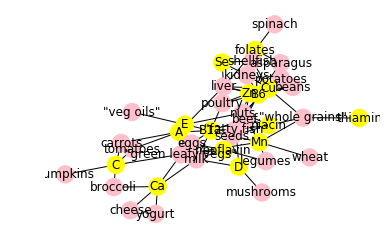

In [120]:
plt.axis('off')
nx.draw_networkx(graph_n,nx.spring_layout(graph_n),node_color=colors)